# Kernel PCA


* Non-linear dimensionality reduction through the use of kernels

[Scikit Learn Documentation](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html)

[Scikit Learn Reference](http://scikit-learn.org/stable/auto_examples/decomposition/plot_kernel_pca.html)

This is inspired by this [scikit notebook by Mathieu Blondel and Andreas Mueller](http://scikit-learn.org/stable/auto_examples/decomposition/plot_kernel_pca.html#sphx-glr-auto-examples-decomposition-plot-kernel-pca-py)

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

In [25]:
from sklearn.datasets import make_circles
from sklearn.decomposition import PCA, KernelPCA

In [26]:
np.random.seed(0)
X, y = make_circles(n_samples=400, factor=.3, noise=.05)

In [27]:
KernelPCA?

In [28]:
kpca = KernelPCA(kernel="rbf", gamma=10, fit_inverse_transform=True)
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)
pca = PCA()
X_pca = pca.fit_transform(X)

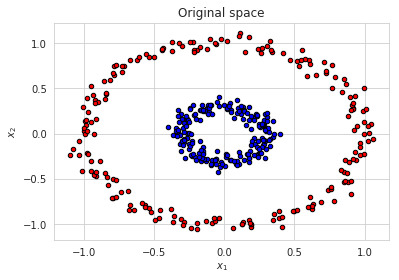

In [29]:
plt.figure()
plt.title("Original space")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$");

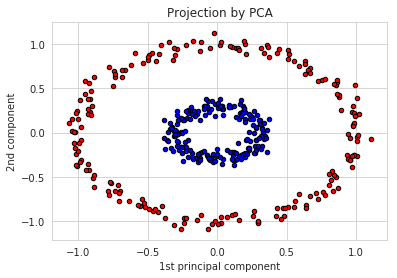

In [30]:
plt.scatter(X_pca[reds, 0], X_pca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_pca[blues, 0], X_pca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Projection by PCA")
plt.xlabel("1st principal component")
plt.ylabel("2nd component");

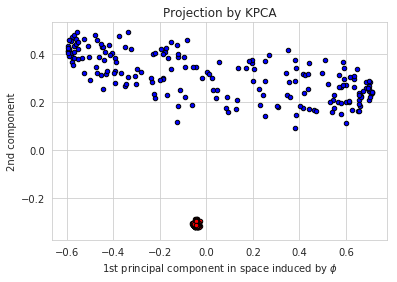

In [31]:
plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Projection by KPCA")
plt.xlabel("1st principal component in space induced by $\phi$")
plt.ylabel("2nd component");

***

# Kernel PCA Example

In [42]:
df = sns.load_dataset('iris')
df = df[df['species'] != 'setosa']

In [43]:
df.shape

(100, 5)

In [44]:
df.iloc[:5,:]

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


In [45]:
col = ['petal_length', 'petal_width']
X = df.loc[:, col]
species_to_num = {'versicolor': 0,
                  'virginica': 1}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']

In [46]:
kpca = KernelPCA(kernel='rbf', n_components=2)
X_kpca = kpca.fit_transform(X)                 

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
clf = LogisticRegression()
clf.fit(X, y)

/home/pandit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

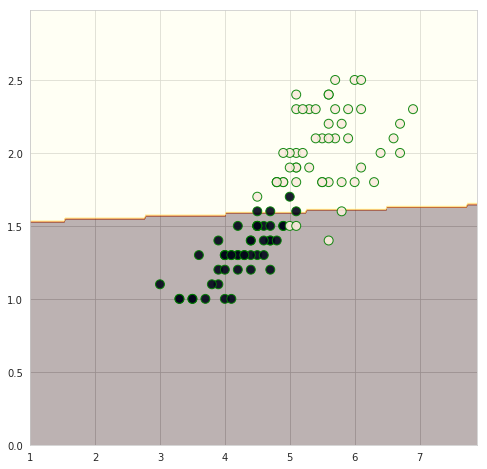

In [50]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(8,8))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3);
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=80, 
            alpha=0.9, edgecolors='g');

In [39]:
clf.fit(X_kpca, y)

/home/pandit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
Xv = X_kpca
h = 0.02
x_min, x_max = Xv.min()- 0.5, Xv.max() + 0.5
y_min, y_max = y.min() - 0.5, y.max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

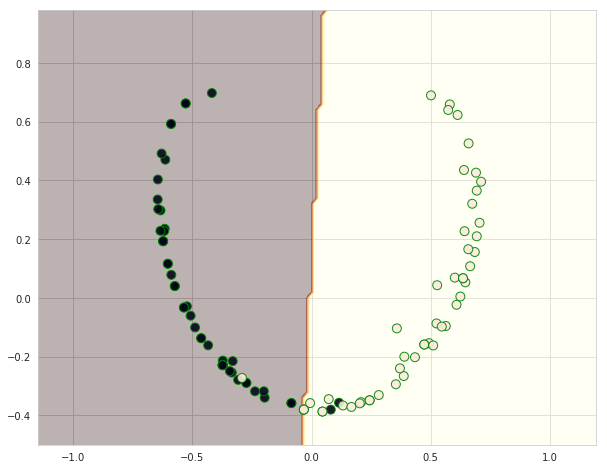

In [41]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(10,8))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3);
plt.scatter(X_kpca[:,0], X_kpca[:,1], c=y, s=80, 
            alpha=0.9, edgecolors='g');